In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
print(df['diabetes'].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


<Axes: xlabel='diabetes', ylabel='count'>

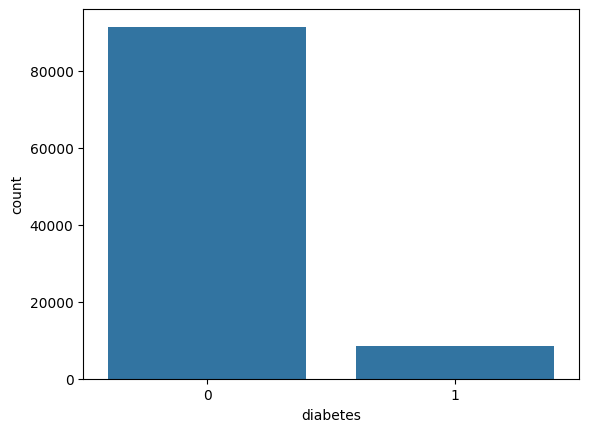

In [40]:
sns.countplot(x="diabetes", data=df)

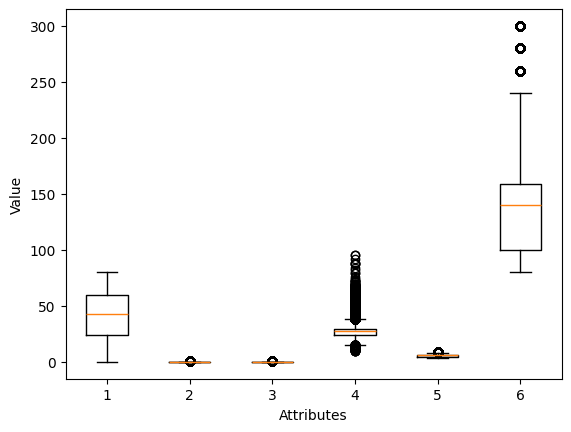

In [6]:
data_to_boxplot = [df['age'], df['hypertension'], df['heart_disease'], 
			df['bmi'], df['HbA1c_level'], df['blood_glucose_level']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [7]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder
#Encoding
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df["gender"])
df['smoking_encoded'] = le.fit_transform(df["smoking_history"])

In [19]:
training_points = df.drop(columns=['diabetes', 'gender', 'smoking_history'])

training_points.info()

training_labels = df['diabetes']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   gender_encoded       100000 non-null  int32  
 7   smoking_encoded      100000 non-null  int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 5.3 MB


In [20]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_encoded
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.414660,2.179650
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.493031,1.889659
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,3.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.000000,4.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,2.000000,5.000000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 8)
(70000,)
(30000, 8)
(30000,)


In [22]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)

[0 0 0 ... 0 0 0]


In [25]:
print(confusion_matrix(y_test, guesses))

[[27205   204]
 [ 1201  1390]]


0.9593666666666667


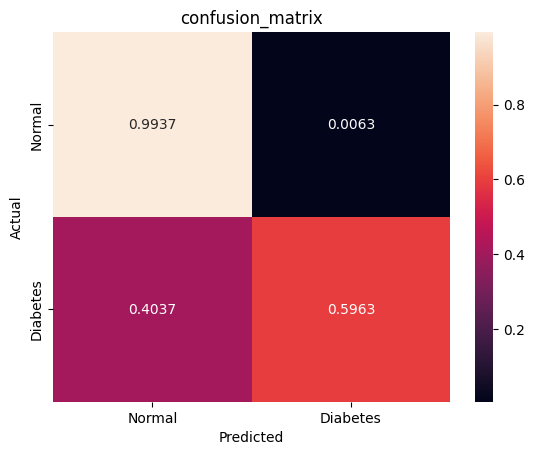

In [34]:
import seaborn as sns

print(metrics.accuracy_score(y_test, guesses))

cm = confusion_matrix(y_test, guesses)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

[0.9410666666666667, 0.9533333333333334, 0.9516, 0.9538333333333333, 0.9531666666666667, 0.9532, 0.9538666666666666, 0.9526666666666667, 0.9534666666666667, 0.9527333333333333, 0.9533333333333334, 0.9519666666666666, 0.9525, 0.9518, 0.9522666666666667, 0.9514, 0.952, 0.9513333333333334, 0.9517666666666666, 0.9511333333333334, 0.9514333333333334, 0.9508666666666666, 0.9512666666666667, 0.9507333333333333, 0.9507666666666666, 0.9503666666666667, 0.9503666666666667, 0.9499, 0.9501333333333334, 0.9497333333333333, 0.9501, 0.9500666666666666, 0.9503, 0.9497, 0.95, 0.9496, 0.9496, 0.9494333333333334, 0.9496, 0.9493, 0.9495333333333333, 0.9491333333333334, 0.9494666666666667, 0.9491, 0.9494, 0.9490666666666666, 0.9491333333333334, 0.9488666666666666, 0.9489666666666666]


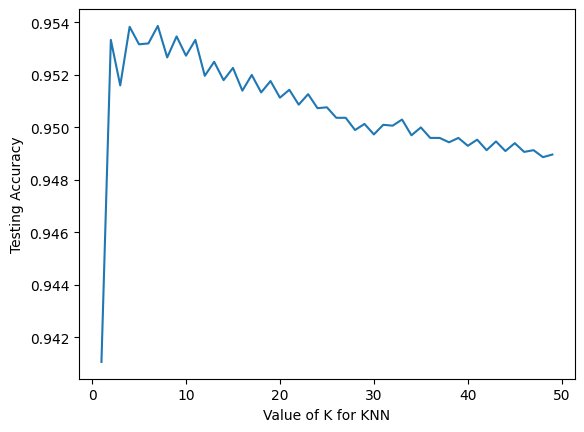

In [26]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# k = 7

In [41]:
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)

[0 0 0 ... 0 0 0]


0.9538666666666666


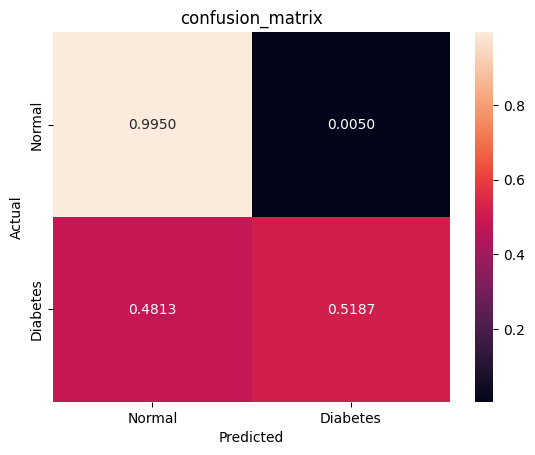

In [42]:
print(metrics.accuracy_score(y_test, guesses))

cm = confusion_matrix(y_test, guesses)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

[0 0 0 ... 0 0 0]


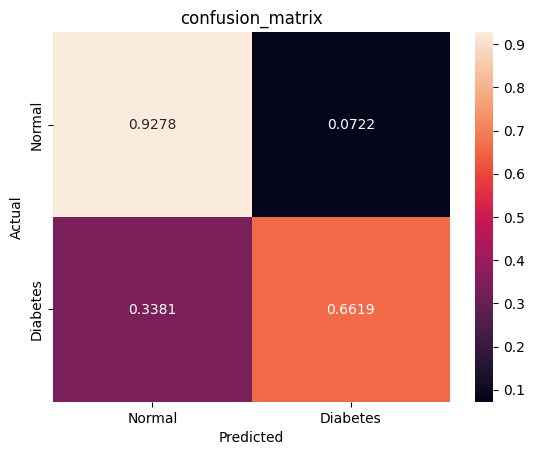

0.9048333333333334


In [35]:
from sklearn.naive_bayes import GaussianNB

# 5. Fit Naïve Bayes Classifier to the training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

# 6. Check Accuracy Score
cm = confusion_matrix(y_test, guesses)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

print(metrics.accuracy_score(y_test, guesses))

[0 0 0 ... 0 0 0]
0.9593666666666667


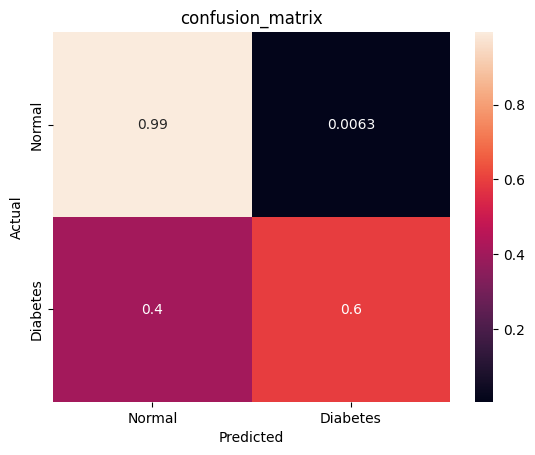

In [32]:
from sklearn.svm import SVC

# 5. Fit SVM Classifier to the training set
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

# 6. Check Accuracy Score
print(metrics.accuracy_score(y_test, guesses))

cm = confusion_matrix(y_test, guesses)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

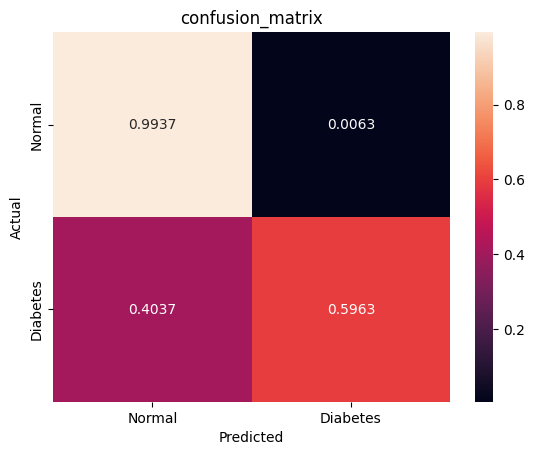

In [33]:
sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

<Axes: >

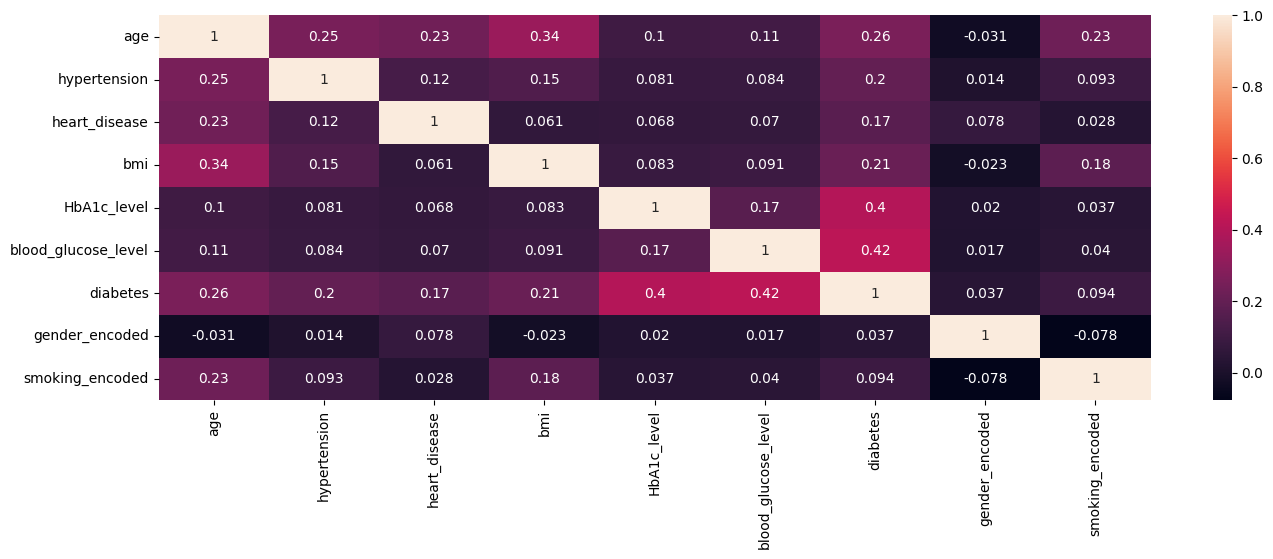

In [37]:
# 9. Improving Accuracy: Feature Engineering
df2 = df.drop(columns=['gender', 'smoking_history'])
dfcorr = df2.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

KNN, SVM, NB 다 각자 따로 진행 ㄱㄱ